# Philippine Poverty Statistics - Data Preparation

### Reading Input

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_df = pd.read_csv('povstat_processed.csv')

# Copy of df for all processing and analysis, original input_df kept as backup
df = input_df.copy() 
df

,Unnamed: 0,Variable,Year,province,value,adm_level,region,unit
0,0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos
...,...,...,...,...,...,...,...,...
3600,3600,Magnitude of Subsistence Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3601,3601,Magnitude of Subsistence Poor Population,2006,Zamboanga del Sur,"268,576",Province,Region IX,population
3602,3602,Magnitude of Subsistence Poor Population,2009,Zamboanga del Sur,"261,992",Province,Region IX,population
3603,3603,Magnitude of Subsistence Poor Population,2012,Zamboanga del Sur,"209,765",Province,Region IX,population


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3605 non-null   int64 
 1   Variable    3605 non-null   object
 2   Year        3605 non-null   int64 
 3   province    3605 non-null   object
 4   value       3010 non-null   object
 5   adm_level   3360 non-null   object
 6   region      3360 non-null   object
 7   unit        3605 non-null   object
dtypes: int64(2), object(6)
memory usage: 225.4+ KB


### Cleanup
Before further data preparation, I first drop the unneeded index column and rename columns for consistency.

In [4]:
# Drop first column (index) as Pandas dataframe already adds index
df.drop(columns=df.columns[[0]], axis=1, inplace=True)

In [5]:
# Rename columns
df.rename(columns = {
    'Variable': 'Variable',
    'Year': 'Year',
    'province': 'Province',
    'value': 'Value',
    'adm_level': 'Admin_Lvl',
    'region': 'Region',
    'unit': 'Unit'
}, inplace=True)

### Inspect unique values
To get a general grasp of the dataset, I then inspect the unique values of each column. This helps give a grasp of:
- How diverse the values are per column
- The datatype of each column
- Missing values (if any)

In [6]:
# Print counts of unique values per column
print("Unique value counts per column:")
df.nunique()

Unique value counts per column:


Variable        7
Year            5
Province      103
Value        2168
Admin_Lvl       4
Region         18
Unit            4
dtype: int64

In [7]:
# List unique values per column
unique_vars = df['Variable'].unique().tolist()
unique_years = df['Year'].unique().tolist()
unique_admins = df['Admin_Lvl'].unique().tolist()
unique_regions = df['Region'].unique().tolist()
unique_units = df['Unit'].unique().tolist()

In [8]:
print("Unique values in Variable:")
print("\n".join(map(str, unique_vars)))

Unique values in Variable:
Annual Per Capita Poverty Threshold (in Pesos)
Poverty Incidence among Families (%)
Magnitude of Poor Families
Poverty Incidence among Population (%)
Magnitude of Poor Population
Subsistence Incidence among Population (%)
Magnitude of Subsistence Poor Population


In [9]:
print("Unique values in Year:")
print("\n".join(map(str, unique_years)))

Unique values in Year:
1991
2006
2009
2012
2015


In [10]:
print("Unique values in Admin_Lvl:")
print("\n".join(map(str, unique_admins)))

Unique values in Admin_Lvl:
District
Region
Province
nan
Country


In [11]:
print("Unique values in Region:")
print("\n".join(map(str, unique_regions)))

Unique values in Region:
NCR
ARMM
CAR
CARAGA
Region VI
Region V
nan
Region III
Region VI-A
Region VIII
Region VII
Region X
Region II
Region XI
Region I
Region IV-B
Region XII
Philippines
Region IX


In [12]:
print("Unique values in Unit:")
print("\n".join(map(str, unique_units)))

Unique values in Unit:
in Pesos
%
families
population


From the listed unique values, the ```Value``` and ```Year``` columns appear to be numerical data, while all other columns are categorical data.

### Cast columns to relevant datatypes
Each column is then cast to their respective datatypes. Only ```Value``` needs to be prepared for type conversion, which is done as below.

In [13]:
# Inspect which entries under 'Value' may cause trouble with type conversion
faulty_values = df[pd.to_numeric(df['Value'], errors='coerce').isnull()]['Value'].unique()

print(f"{len(faulty_values)} faulty values returned:")
list(faulty_values)[:5] # Only 5 shown in this notebook for brevity

1671 faulty values returned:


[nan, '  15,699 ', '  19,227 ', '  20,344 ', '  25,007 ']

In [14]:
# Apply adjustments to entries under 'Value' to prepare for type conversion
df['Value'] = df['Value'].str.strip()
df['Value'] = df['Value'].str.replace(",", "")
df['Value'] = df['Value'].replace("-", np.NaN)

In [15]:
# Convert datatypes of all columns into more relevant ones
df = df.astype({
    'Variable': 'category',
    'Year': 'int64',
    'Province': 'category',
    'Value': 'float64',
    'Admin_Lvl': 'category',
    'Region': 'category',
    'Unit': 'category'
})

# Inspect new datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Variable   3605 non-null   category
 1   Year       3605 non-null   int64   
 2   Province   3605 non-null   category
 3   Value      3008 non-null   float64 
 4   Admin_Lvl  3360 non-null   category
 5   Region     3360 non-null   category
 6   Unit       3605 non-null   category
dtypes: category(5), float64(1), int64(1)
memory usage: 80.4 KB


### Plot data distribution
To get a visual sense for the data, I plot the distribution and diversity of data points through countplots.

In [16]:
# Abbreviations for x tick labels
vars_labels = ['APT', 'PI(F)', 'MPF', 'PI(P)', 'MPP', 'SI', 'MSP']
year_labels = unique_years
prov_labels = []
admin_labels = ['District', 'Region', 'Province', 'Country']
region_labels = ['NCR', 'ARMM', 'CAR', '13', 'PH', '5', '3', '4A', '8', '7', '10', '2', '11', '1', '4B', '12', '6', '9']
unit_labels = unique_units

xticklabels = [vars_labels, year_labels, prov_labels, admin_labels, region_labels, unit_labels]

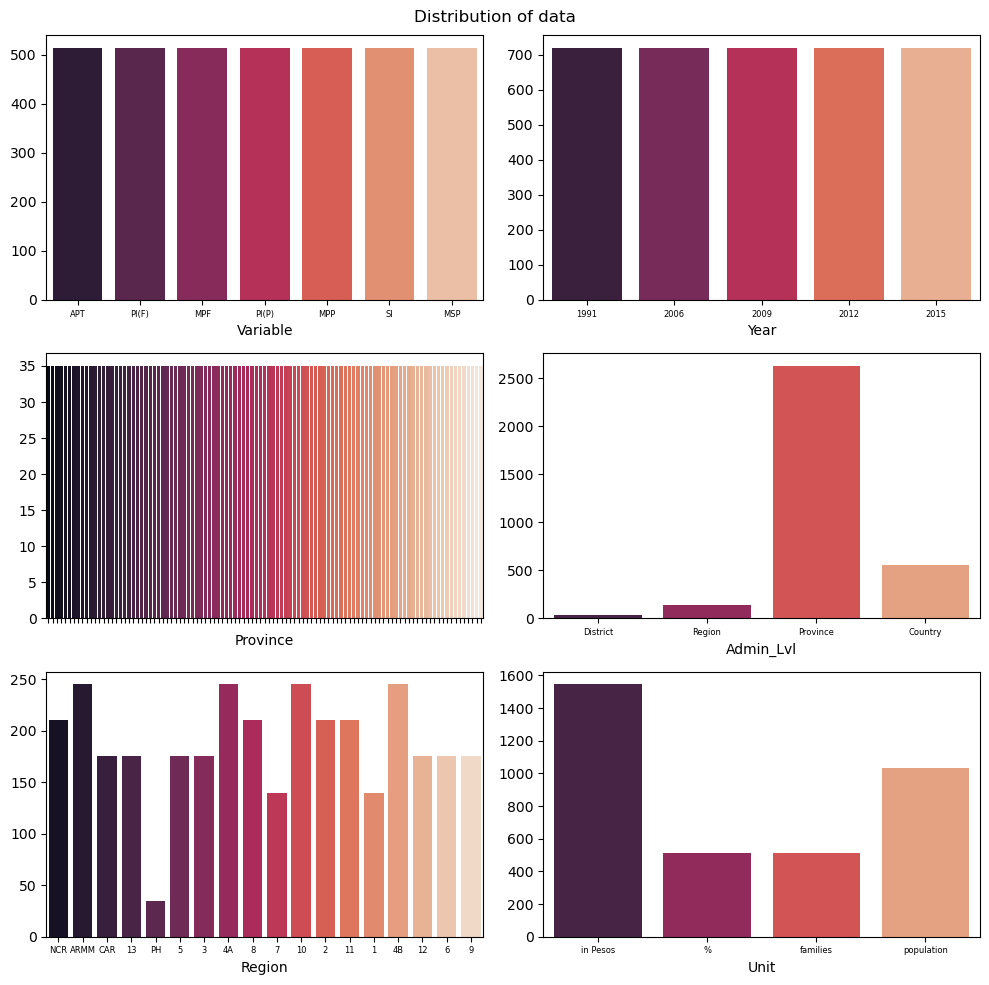

In [17]:
# Show general distribution of data

# Get list of columns to iterate over
cols = list(df.columns)
cols.remove('Value')


# PLot distribution
plt.figure(figsize = (10, 10))
plt.suptitle("Distribution of data")

for i in range(len(cols)):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=cols[i], palette='rocket')
    ax.set_ylabel('')
    ax.set_xticklabels(xticklabels[i], fontsize=6)

plt.tight_layout()
plt.show()

### Inspect missing values
Missing values are then inspected to investigate:
- Are there any patterns to the missing data?
- Are the missing data in the same format?
- How prevalent is the missing data, and in which columns?
- How should the missing data be acted upon? Should it be excluded from analysis or does it enrich analysis?
- Would the missing data still contribute to developing a better picture of poverty?

Since the unique values listed earlier already show that the missing values are already in a Pandas-readable format (i.e. ```NaN``` instead of ```"N/A"```, ```"No"```, etc.), the next step is to inspect missing values across the whole dataset.

In [18]:
# Show total of missing values per column 
missing_count = df.isna().sum()
missing_percent = (df.isna().sum()/df.isna().count())

pd.concat([missing_count, missing_percent], 
          axis=1, 
          keys=['Count of missing values', 'Percent of total'])

,Count of missing values,Percent of total
Variable,0,0.000000
Year,0,0.000000
Province,0,0.000000
Value,597,0.165603
Admin_Lvl,245,0.067961
Region,245,0.067961
Unit,0,0.000000


### Inspect missing values: ```Admin_Lvl``` & ```Region```

Given the same amount of missing values, I first test whether missing ```Admin_Lvl``` & ```Region``` may be from the same rows (i.e. whatever is missing ```Admin_Lvl``` is also be missing ```Region``` data). This hypothesis can be tested with a simple comparison check below.

In [19]:
# Investigate missing Admin_Lvl & Region values

# Extract rows with missing Admin_Lvl
missing_admin = df[df['Admin_Lvl'].isna()]
# Extract rows with missing Region
missing_region = df[df['Region'].isna()]

print("Are rows with missing Admin_Lvl rows the same as the rows with missing Region values (and vice versa)?")
print(missing_admin.equals(missing_region))

Are rows with missing Admin_Lvl rows the same as the rows with missing Region values (and vice versa)?
True


In [20]:
# Inspect provinces with missing Admin_Lvl and Region values

# Get province occurrences with missing Admin_Lvl and Region values
missing_province_counts = missing_admin['Province'].value_counts()
missing_provinces = missing_province_counts[missing_province_counts > 0]

# Get overall counts of those provinces from the overall dataset
province_counts = df['Province'].value_counts()
province_counts = province_counts[missing_provinces.index]

missing_provinces_percent = (missing_provinces/province_counts)


pd.concat([missing_provinces, missing_provinces_percent], 
          axis=1, 
          keys=['Count of missing values', 'Percent of total'])

,Count of missing values,Percent of total
Camiguin,35,1.0
"Cotabato City,",35,1.0
"Isabela City,",35,1.0
"Guimaras,",35,1.0
Aurora,35,1.0
"Siquijor,",35,1.0
Batanes,35,1.0


From the table above, all data points for these provinces are missing ```Admin_Lvl``` and ```Region``` data, which will later be addressed. There are also minor typographical errors with extra commas that can be fixed.

In [21]:
# Rename provinces with extra commas
df = df.replace('Cotabato City,', 'Cotabato City')
df = df.replace('Isabela City,', 'Isabela City')
df = df.replace('Guimaras,', 'Guimaras')
df = df.replace('Siquijor,', 'Siquijor')

# Show a few sample rows to demonstrate changes
df.loc[df['Province'] == 'Siquijor'][:2]

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
3080,Annual Per Capita Poverty Threshold (in Pesos),1991,Siquijor,NaN,NaN,NaN,in Pesos
3081,Annual Per Capita Poverty Threshold (in Pesos),2006,Siquijor,13971.0,NaN,NaN,in Pesos


Based on the type of missing data, ```Admin_Lvl``` and ```Region``` can still be filled in with accuracy based on  ```Province```. Hence, the missing data is filled below.

In [22]:
# Manually resolve missing Admin_Lvl and Region values based on province

provinces = ['Camiguin', 'Cotabato City', 'Isabela City', 'Guimaras', 'Aurora', 'Siquijor', 'Batanes']
regions = ['Region X', 'Region XII', 'Region IX', 'Region VI', 'Region III', 'Region VII', 'Region II']

for index, province in enumerate(provinces):
    df.loc[df['Province'] == province, 'Admin_Lvl'] = 'Province'
    df.loc[df['Province'] == province, 'Region'] = regions[index]

# Show a few sample rows to demonstrate changes
df.loc[df['Province'].isin(provinces)]

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
420,Annual Per Capita Poverty Threshold (in Pesos),1991,Aurora,NaN,Province,Region III,in Pesos
421,Annual Per Capita Poverty Threshold (in Pesos),2006,Aurora,11883.0,Province,Region III,in Pesos
422,Annual Per Capita Poverty Threshold (in Pesos),2009,Aurora,14979.0,Province,Region III,in Pesos
423,Annual Per Capita Poverty Threshold (in Pesos),2012,Aurora,18466.0,Province,Region III,in Pesos
424,Annual Per Capita Poverty Threshold (in Pesos),2015,Aurora,20458.0,Province,Region III,in Pesos
...,...,...,...,...,...,...,...
3110,Magnitude of Subsistence Poor Population,1991,Siquijor,NaN,Province,Region VII,population
3111,Magnitude of Subsistence Poor Population,2006,Siquijor,15473.0,Province,Region VII,population
3112,Magnitude of Subsistence Poor Population,2009,Siquijor,4795.0,Province,Region VII,population
3113,Magnitude of Subsistence Poor Population,2012,Siquijor,11084.0,Province,Region VII,population


In [23]:
# Check if all missing Admin_Lvl & Region values have been addressed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Variable   3605 non-null   category
 1   Year       3605 non-null   int64   
 2   Province   3605 non-null   category
 3   Value      3008 non-null   float64 
 4   Admin_Lvl  3605 non-null   category
 5   Region     3605 non-null   category
 6   Unit       3605 non-null   category
dtypes: category(5), float64(1), int64(1)
memory usage: 80.4 KB


There are now 3605/3605 non-null values for ```Admin_Lvl``` & ```Region```, so all missing values under these have been resolved.

### Inspect missing values: ```Value```
Next, any possible patterns for missing data under ```Value``` are investigated.

In [24]:
# Extract rows with missing data under "Value"
missing_values = df[df['Value'].isna()]
missing_values

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
5,Poverty Incidence among Families (%),1991,1st District,NaN,District,NCR,%
10,Magnitude of Poor Families,1991,1st District,NaN,District,NCR,families
15,Poverty Incidence among Population (%),1991,1st District,NaN,District,NCR,%
20,Magnitude of Poor Population,1991,1st District,NaN,District,NCR,population
...,...,...,...,...,...,...,...
3580,Magnitude of Poor Families,1991,Zamboanga del Sur,NaN,Province,Region IX,families
3585,Poverty Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%
3590,Magnitude of Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3595,Subsistence Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%


In [25]:
# Inspect unique value counts
print("Unique value counts for rows that have missing values:")
missing_values.nunique()

Unique value counts for rows that have missing values:


Variable      7
Year          2
Province     85
Value         0
Admin_Lvl     2
Region       17
Unit          4
dtype: int64

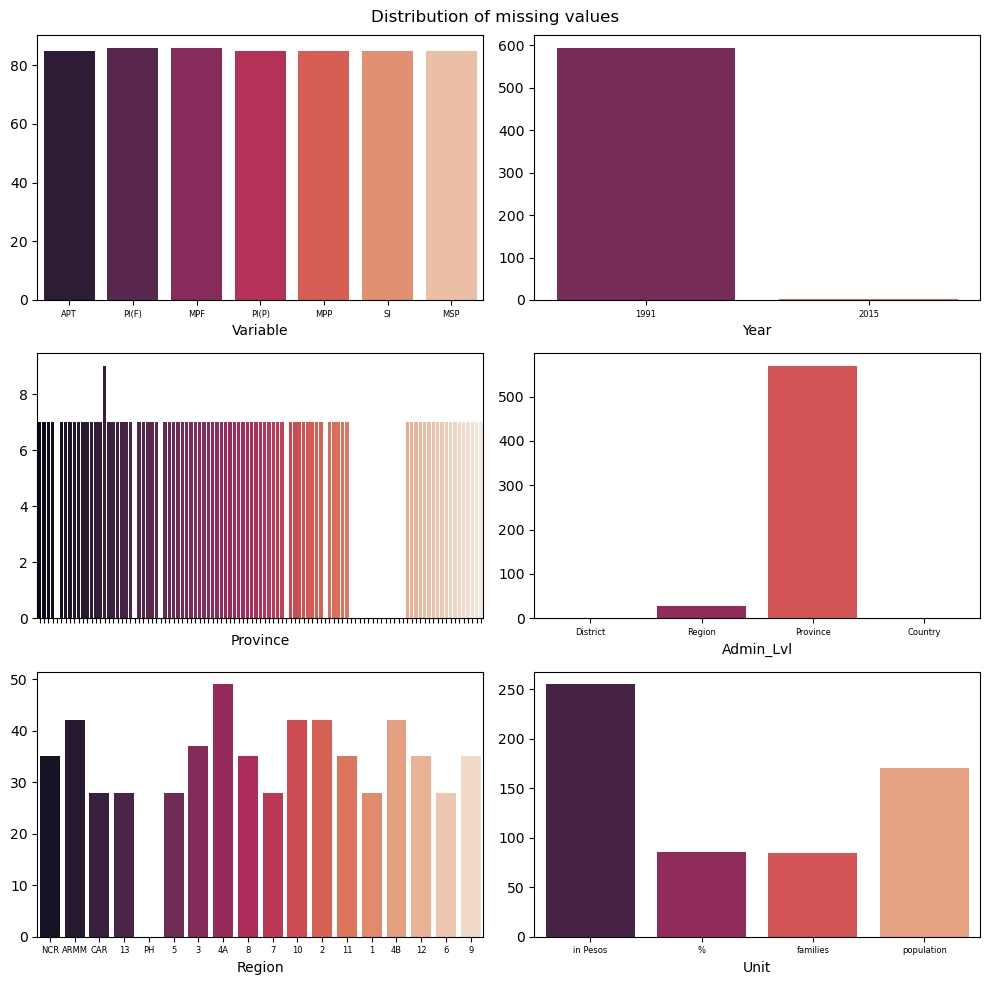

In [26]:
# Get list of other columns to iterate over
cols = list(df.columns)
cols.remove('Value')

# PLot distribution of missing values
plt.figure(figsize = (10, 10))
plt.suptitle("Distribution of missing values")

# Abbreviations for x tick labels
xticklabels = [vars_labels, [1991, 2015], prov_labels, admin_labels, region_labels, unit_labels]

for i in range(len(cols)):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(data=missing_values, x=cols[i], palette='rocket')
    ax.set_ylabel('')
    ax.set_xticklabels(xticklabels[i], fontsize=6)

plt.tight_layout()
plt.show()

The two figures above raise the following observations:
- Missing values are overall equally spaced out by ```Variable```, ```Province```, and ```Region```
- There are only 2 ```Year```s with missing data, with nearly all concentrated in a single year
- Similarly, there are only 2 ```Admin_Lvl```s with missing data, with nearly all concentrated in a single level

From the 2nd point, the next step could be to investigate the missing data by year.

In [27]:
# Print exact number of missing values by year
print("Count of missing entries under 'Value' by year")
missing_by_year = missing_values.groupby(by="Year")
missing_by_year.size()

Count of missing entries under 'Value' by year


Year
1991    595
2015      2
dtype: int64

A very small amount of missing values appear to be under 2015, with the rest being under 1991. These are further investigated below:

In [77]:
# Query missing 2015 data
missing_2015 = missing_values.query('Year == 2015')
missing_2015

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
539,Magnitude of Poor Families,2015,Batanes,NaN,Province,Region II,families
549,Magnitude of Poor Population,2015,Batanes,NaN,Province,Region II,population


In [28]:
# Inspect what % of 1991 data is unavailable
missing_1991_cnt = len(missing_values.query('Year == 1991'))
total_1991_cnt = len(df.query('Year == 1991'))

print(f"{missing_1991_cnt*100/total_1991_cnt}% of 1991 data is missing ({missing_1991_cnt}/{total_1991_cnt} rows)")

82.52427184466019% of 1991 data is missing (595/721 rows)


In [53]:
poverty_magnitude.query('Region == "Philippines"')

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit


As majority of 1991 data is missing, it could simply be omitted from analysis. However, before dropping it, it may be preferable to look at the 1991 data and if it differs from the other years, especially given its great time gap to the other years. 

In [29]:
data_1991 = df.query('Year == 1991')
data_1991

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
5,Poverty Incidence among Families (%),1991,1st District,NaN,District,NCR,%
10,Magnitude of Poor Families,1991,1st District,NaN,District,NCR,families
15,Poverty Incidence among Population (%),1991,1st District,NaN,District,NCR,%
20,Magnitude of Poor Population,1991,1st District,NaN,District,NCR,population
...,...,...,...,...,...,...,...
3580,Magnitude of Poor Families,1991,Zamboanga del Sur,NaN,Province,Region IX,families
3585,Poverty Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%
3590,Magnitude of Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3595,Subsistence Incidence among Population (%),1991,Zamboanga del Sur,NaN,Province,Region IX,%


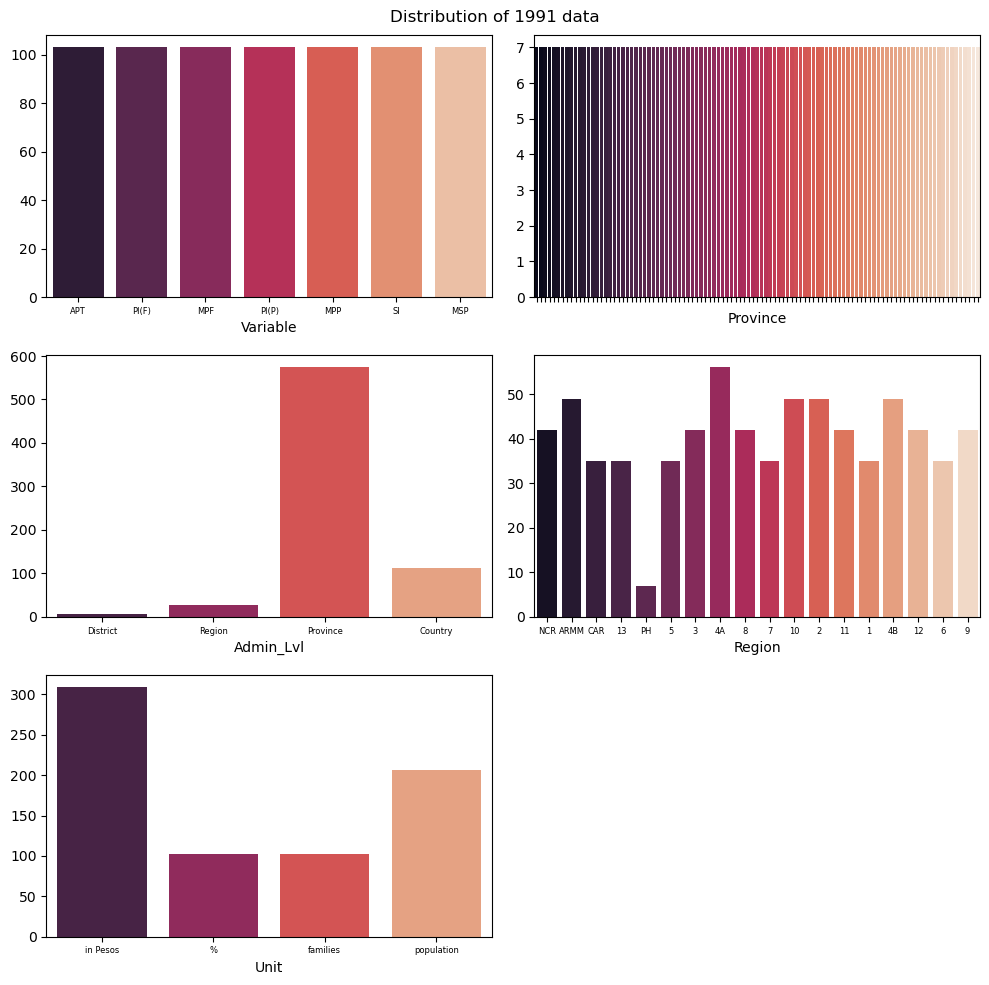

In [30]:
# Get list of other columns to iterate over
cols = list(df.columns)
cols.remove('Value')
cols.remove('Year')

# PLot distribution
plt.figure(figsize = (10, 10))
plt.suptitle("Distribution of 1991 data")

# Abbreviations for x tick labels
xticklabels = [vars_labels, prov_labels, admin_labels, region_labels, unit_labels]

for i in range(len(cols)):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(data=data_1991, x=cols[i], palette='rocket')
    ax.set_ylabel('')
    ax.set_xticklabels(xticklabels[i], fontsize=6)

plt.tight_layout()
plt.show()

Given the distribution of 1991 data, it may be best to keep it in the dataset but treat it differently from the other years where possible. Similar steps are then done to investigate missing values by administration level.

In [31]:
# Print exact number of missing values by admin level
print("Count of missing entries under 'Value' by administration level")
missing_by_admin = missing_values.groupby(by="Admin_Lvl")
missing_by_admin.size()

Count of missing entries under 'Value' by administration level


Admin_Lvl
Country       0
District     28
Province    569
Region        0
dtype: int64

Majority of missing data are from the province level. However, this makes sense in context as the province is the most common administration level. There are also a great number of provinces, among which the missing data is spread out.

### Correcting mislabelled data: Changing 
Lastly, there appear to be several rows with incorrectly labelled ```Admin_Lvl```. This is inspected and corrected below.

In [70]:
unique_districts = list(df.query('Admin_Lvl == "District"')['Province'].unique())
unique_provinces = list(df.query('Admin_Lvl == "Province"')['Province'].unique())
unique_regions = list(df.query('Admin_Lvl == "Region"')['Province'].unique())
unique_countries = list(df.query('Admin_Lvl == "Country"')['Province'].unique())

print("Unique Places under District:", unique_districts)

Unique Places under District: ['1st District', '2nd District', '3rd District', '4th District']


In [71]:
print("Unique Places under Province:", unique_provinces)

Unique Places under Province: ['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes', 'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan', 'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz', 'Catanduanes', 'Cavite', 'Cebu', 'Compostela Valley', 'Cotabato City', 'Davao Oriental', 'Davao del Norte', 'Davao del Sur', 'Eastern Samar', 'Guimaras', 'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Isabela City', 'Kalinga', 'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte', 'Maguindanao', 'Marinduque', 'Masbate', 'Misamis Occidental', 'Misamis Oriental', 'Mt. Province', 'Negros Occidental', 'Negros Oriental', 'North Cotabato', 'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga', 'Pangasinan', 'Quezon', 'Quirino', 'Region II', 'Rizal', 'Romblon', 'Saranggani', 'Siquijor', 'Sorsogon', 'South Cotabato', 'Sou

Region II appears as a province above, which is incorrect. These rows will be corrected later.

In [72]:
print("Unique Places under Region:", unique_regions)

Unique Places under Region: ['ARMM', 'CAR', 'Caraga', 'NCR', 'Region I', 'Region III', 'Region IV-A', 'Region IV-B', 'Region IX', 'Region V', 'Region VI', 'Region VII', 'Region VIII', 'Region X', 'Region XI', 'Region XII']


In [73]:
print("Unique Places under Country:", unique_countries)

Unique Places under Country: ['PHILIPPINES']


To correct the mislabelled rows, rows with Region II under ```Province``` are queried and changed from ```Admin_Lvl = Province``` to  ```Admin_Lvl = Region```.

In [75]:
# Query mislabelled rows
mislabelled = df.query('Province == "Region II" and Admin_Lvl == "Province"')
mislabelled

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
2555,Annual Per Capita Poverty Threshold (in Pesos),1991,Region II,6525.0,Province,Region II,in Pesos
2556,Annual Per Capita Poverty Threshold (in Pesos),2006,Region II,13944.0,Province,Region II,in Pesos
2557,Annual Per Capita Poverty Threshold (in Pesos),2009,Region II,17330.0,Province,Region II,in Pesos
2558,Annual Per Capita Poverty Threshold (in Pesos),2012,Region II,19125.0,Province,Region II,in Pesos
2559,Annual Per Capita Poverty Threshold (in Pesos),2015,Region II,21860.0,Province,Region II,in Pesos
2560,Poverty Incidence among Families (%),1991,Region II,37.3,Province,Region II,%
2561,Poverty Incidence among Families (%),2006,Region II,21.7,Province,Region II,%
2562,Poverty Incidence among Families (%),2009,Region II,20.2,Province,Region II,%
2563,Poverty Incidence among Families (%),2012,Region II,17.0,Province,Region II,%
2564,Poverty Incidence among Families (%),2015,Region II,11.7,Province,Region II,%


In [76]:
# Correct mislabelled rows
df.loc[mislabelled.index, 'Admin_Lvl'] = 'Region'
df.loc[mislabelled.index]

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
2555,Annual Per Capita Poverty Threshold (in Pesos),1991,Region II,6525.0,Region,Region II,in Pesos
2556,Annual Per Capita Poverty Threshold (in Pesos),2006,Region II,13944.0,Region,Region II,in Pesos
2557,Annual Per Capita Poverty Threshold (in Pesos),2009,Region II,17330.0,Region,Region II,in Pesos
2558,Annual Per Capita Poverty Threshold (in Pesos),2012,Region II,19125.0,Region,Region II,in Pesos
2559,Annual Per Capita Poverty Threshold (in Pesos),2015,Region II,21860.0,Region,Region II,in Pesos
2560,Poverty Incidence among Families (%),1991,Region II,37.3,Region,Region II,%
2561,Poverty Incidence among Families (%),2006,Region II,21.7,Region,Region II,%
2562,Poverty Incidence among Families (%),2009,Region II,20.2,Region,Region II,%
2563,Poverty Incidence among Families (%),2012,Region II,17.0,Region,Region II,%
2564,Poverty Incidence among Families (%),2015,Region II,11.7,Region,Region II,%


### Download data for analysis in Tableau
For next steps, Tableau was chosen for data visualization as it allows creating interactive dashboards for the user to interact with the data. Thus, the dataframe is downloaded for next steps in Tableau.

In [33]:
#df_csv = df.to_csv('povstat_prepped.csv')

### Inspecting ```Magnitude of Poor Population``` per region as a share of the national population

In [36]:
# Get all data for Magnitude of Poor Population
poverty_magnitude = df.query('Variable == "Magnitude of Poor Population"')
poverty_magnitude

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
20,Magnitude of Poor Population,1991,1st District,NaN,District,NCR,population
21,Magnitude of Poor Population,2006,1st District,79109.0,District,NCR,population
22,Magnitude of Poor Population,2009,1st District,84914.0,District,NCR,population
23,Magnitude of Poor Population,2012,1st District,102591.0,District,NCR,population
24,Magnitude of Poor Population,2015,1st District,82007.0,District,NCR,population
...,...,...,...,...,...,...,...
3590,Magnitude of Poor Population,1991,Zamboanga del Sur,NaN,Province,Region IX,population
3591,Magnitude of Poor Population,2006,Zamboanga del Sur,515055.0,Province,Region IX,population
3592,Magnitude of Poor Population,2009,Zamboanga del Sur,532271.0,Province,Region IX,population
3593,Magnitude of Poor Population,2012,Zamboanga del Sur,587598.0,Province,Region IX,population


In [50]:
# Separate regional from national data
natl_poverty_magnitude = poverty_magnitude.query('Admin_Lvl == "Country"')
poverty_magnitude = poverty_magnitude.drop(natl_poverty_magnitude.index)
natl_poverty_magnitude

,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
2330,Magnitude of Poor Population,1991,PHILIPPINES,21749656.0,Country,Philippines,population
2331,Magnitude of Poor Population,2006,PHILIPPINES,22643980.0,Country,Philippines,population
2332,Magnitude of Poor Population,2009,PHILIPPINES,23300444.0,Country,Philippines,population
2333,Magnitude of Poor Population,2012,PHILIPPINES,23745895.0,Country,Philippines,population
2334,Magnitude of Poor Population,2015,PHILIPPINES,21927009.0,Country,Philippines,population


In [ ]:
# Drop 1991 data for this analysis since most regions lack 1991 data?

In [60]:
poverty_magnitude.query('Admin_Lvl == "Region"')


,Variable,Year,Province,Value,Admin_Lvl,Region,Unit
160,Magnitude of Poor Population,1991,ARMM,631372.0,Region,ARMM,population
161,Magnitude of Poor Population,2006,ARMM,1450467.0,Region,ARMM,population
162,Magnitude of Poor Population,2009,ARMM,1507868.0,Region,ARMM,population
163,Magnitude of Poor Population,2012,ARMM,1854188.0,Region,ARMM,population
164,Magnitude of Poor Population,2015,ARMM,1990503.0,Region,ARMM,population
...,...,...,...,...,...,...,...
2960,Magnitude of Poor Population,1991,Region XII,1216120.0,Region,Region XII,population
2961,Magnitude of Poor Population,2006,Region XII,1410648.0,Region,Region XII,population
2962,Magnitude of Poor Population,2009,Region XII,1511050.0,Region,Region XII,population
2963,Magnitude of Poor Population,2012,Region XII,1895820.0,Region,Region XII,population


In [56]:
poverty_magnitude.groupby("Province").sum().sort_values('Value')

,Year,Value
Province,,
PHILIPPINES,0,0.0
Batanes,10033,11047.0
Guimaras,10033,123996.0
Isabela City,10033,127981.0
Camiguin,10033,134212.0
...,...,...
Region X,10033,8094810.0
Region VIII,10033,8638376.0
Region VI,10033,10126638.0
